# Name: Akshada Suryakant Satpute

## The Sparks Foundation: Data Science & Business Analytics Internship

## Graduate Rotation Internship Program: (July 2022)

# Task 1: Prediction using Supervised Machine Learning



**Problem Statement:**
- Prediction of the percentage of students based on the number of study hours.
- What will be the predicted score if a student studies for 9.25 hrs per day?

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings as wg
wg.filterwarnings('ignore')

# Importing Dataset using Remote URL

In [2]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Observing the Dataset

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.shape

(25, 2)

##### There are 25 rows and 2 columns in the data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Checking for Null Values in Dataset

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

##### There is no Null Values in the dataset. 

# Descriptive Statistics

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


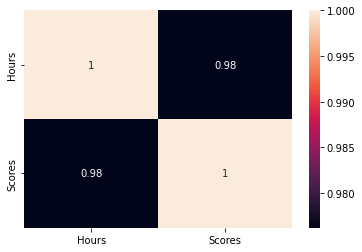

In [10]:
sns.heatmap(data.corr(), annot = True)
plt.show()

##### From the above heatmap, we can see that there is a high correlation between Study Hours and Marks Scores by the students.

# Checking Assumptions

# Assumption 1: Linear Relationship

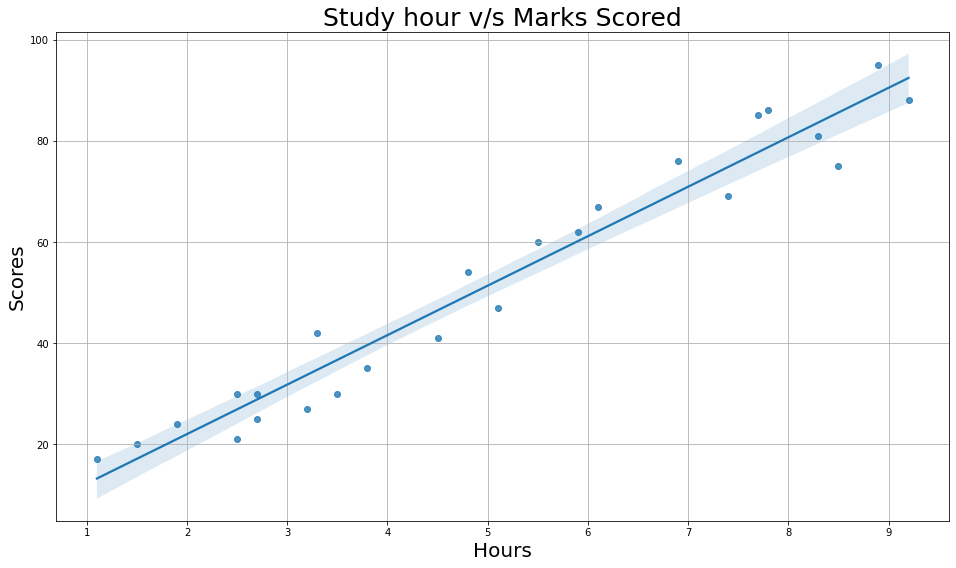

In [11]:
plt.figure(figsize=(16,9))
sns.regplot(x = "Hours", y = "Scores", data = data ) 
plt.title("Study hour v/s Marks Scored", size = 25)
plt.xlabel("Hours", size = 20)
plt.ylabel("Scores", size = 20)
plt.grid()
plt.show()

##### From here we can see that there is a linear relationship between Independent and Dependent Variables.

# Preparing the Data

#### Dividing data into independent and dependent variables

In [12]:
x = data.iloc[:, :-1].values
y = data.iloc[:,1].values

#### Splitting data into training and testing data

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Training the Algorithm

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)
print("Successful!")

Successful!


# Visualizing the Model

### Training Dataset

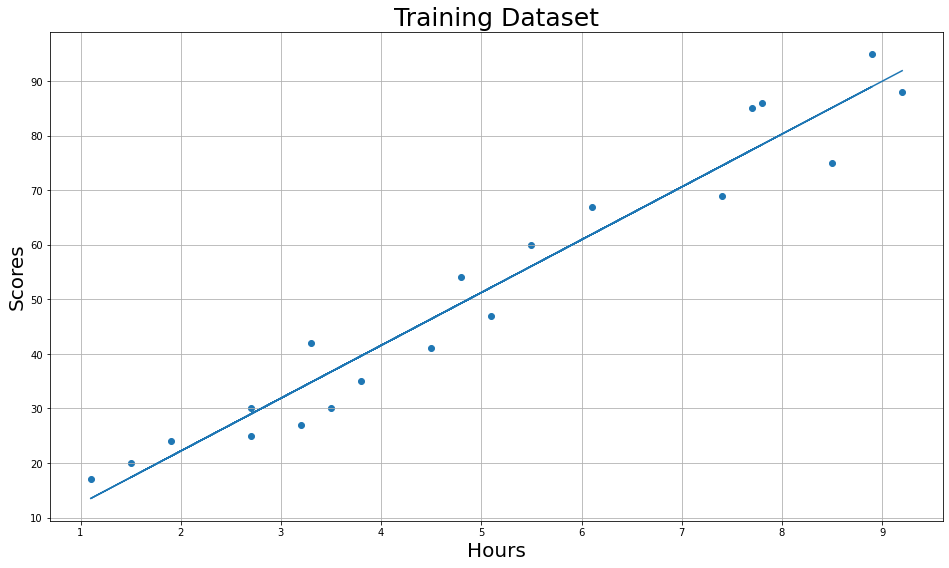

0.9491209376364416

In [15]:
plt.figure(figsize=(16,9))
plt.scatter(x_train, y_train)
plt.title('Training Dataset', size = 25)
plt.plot(x_train, model.predict(x_train))
plt.xlabel('Hours', size = 20)
plt.ylabel('Scores', size = 20)
plt.grid()
plt.show()

model.score(x_train, y_train)

### Testing Dataset

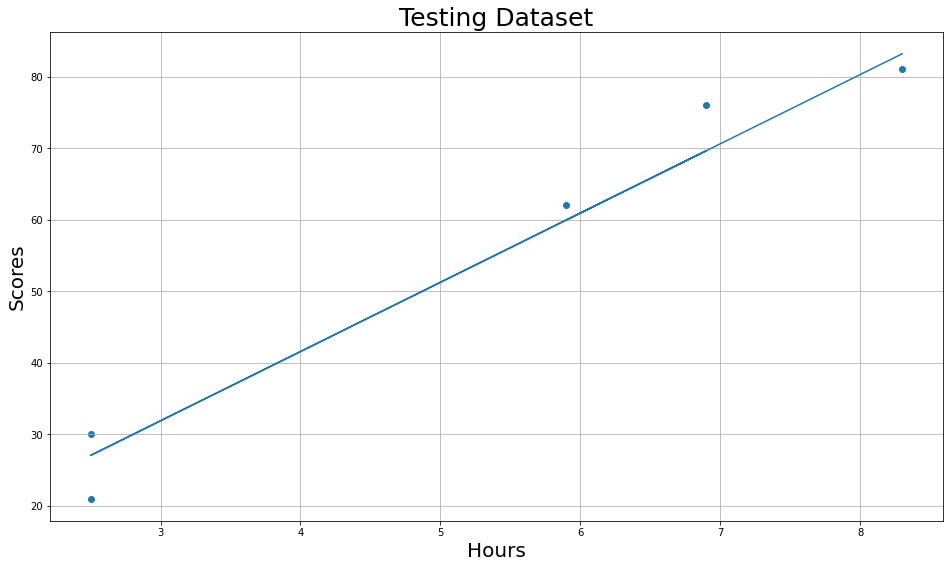

0.9678055545167994

In [16]:
plt.figure(figsize=(16,9))
plt.scatter(x_test, y_test)
plt.title('Testing Dataset', size = 25)
plt.plot(x_test, model.predict(x_test))
plt.xlabel('Hours', size = 20)
plt.ylabel('Scores', size = 20)
plt.grid()
plt.show()

model.score(x_test, y_test)

### Assumption 2: Mean of Residuals 

The mean of residuals should be zero. 

In [17]:
y_predict_train = model.predict(x_train)
residuals = y_train - y_predict_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals: ", mean_residuals)

Mean of Residuals:  8.08242361927114e-15


##### The mean of the residuals is small so we can consider it zero.

### Assumption 3: Residuals should be Homoscedasticity.

Homoscedasticity means that the residuals have equal or almost equal variance.

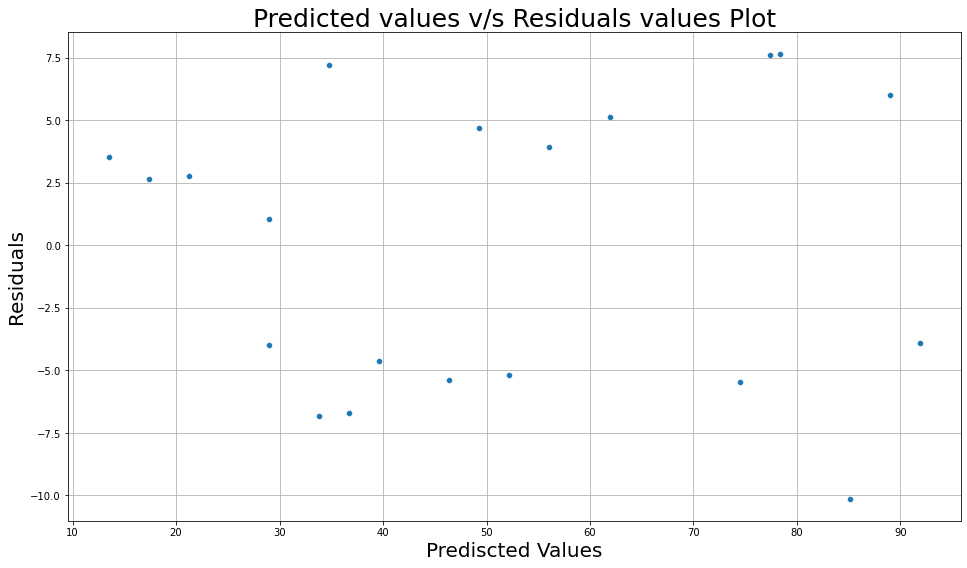

In [18]:
plt.figure(figsize=(16,9))
sns.scatterplot(y_predict_train, residuals)
plt.title('Predicted values v/s Residuals values Plot', size = 25)
plt.xlabel('Prediscted Values', size = 20)
plt.ylabel('Residuals', size = 20)
plt.grid()
plt.show()



##### From the scatter plot we can see that there is no specific patterns are forming, so we say that homoscedasticity is present.

### Assumption 4: No Autocorrelation

Autocorrelation occurs when residuals or error terms are not independent of each other.  

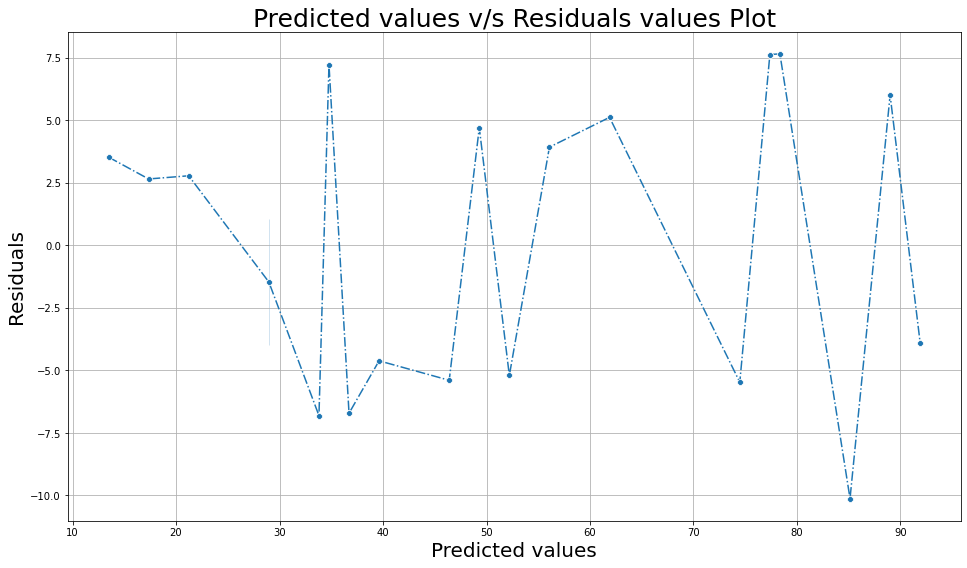

In [19]:
plt.figure(figsize=(16,9))
sns.lineplot(y_predict_train, residuals, marker = '8', linestyle = '-.')
plt.title('Predicted values v/s Residuals values Plot', size = 25)
plt.xlabel('Predicted values', size = 20)
plt.ylabel('Residuals', size = 20)
plt.grid()
plt.show()

##### As we can see that there is no pattern forming so we can say that ther is no autocorrelation.

# Making Prediction
### Test Data

In [20]:
print(x_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


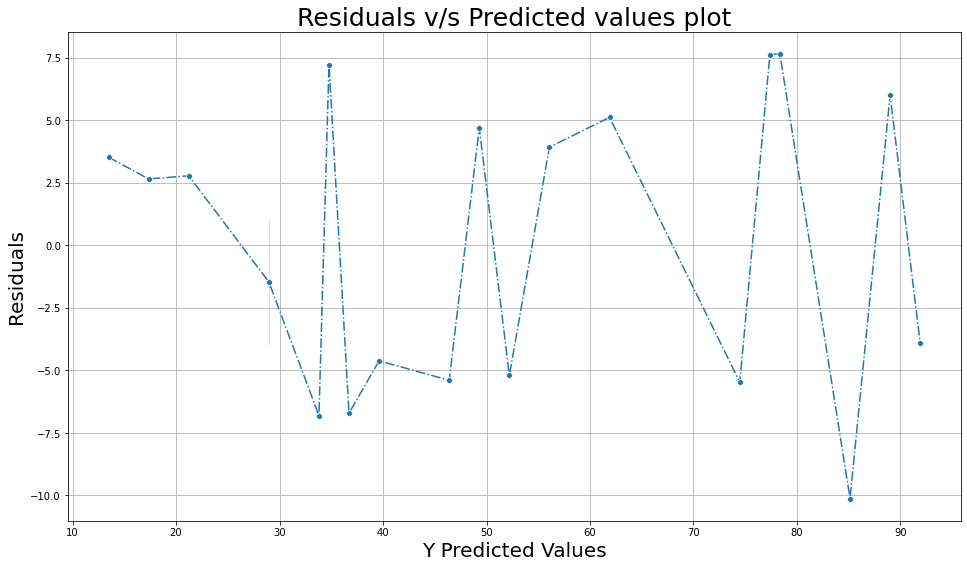

In [21]:
plt.figure(figsize=(16,9))
sns.lineplot(y_predict_train, residuals, marker = '8', linestyle = '-.')
plt.xlabel('Y Predicted Values', size = 20)
plt.ylabel('Residuals', size = 20)
plt.title('Residuals v/s Predicted values plot', size = 25)
plt.grid()
plt.show()

In [22]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

In [23]:
y_predict = model.predict(x_test)
y_predict

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

### Comparing Actual and Predicted 

In [24]:
comp = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_predict})
comp

,Actual Marks,Predicted Marks
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


# Model Evalution

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Mean Absolute Error (MAE)

In [26]:
MAE = (mean_absolute_error(y_test, y_predict))
print('MAE:', MAE)

MAE: 3.9207511902099244


#### Mean Absolute Percentage Error (MAPE)

In [27]:
MAPE = (metrics.mean_absolute_percentage_error(y_test, y_predict))
print('MAPE:',MAPE)

MAPE: 0.10600118977553538


#### Root Mean Squared Error (RMSE)

In [28]:
RMSE = (np.sqrt(mean_squared_error(y_test, y_predict)))
print('RMSE:',RMSE)

RMSE: 4.352380006653288


#### Coefficient of Determination

In [29]:
r2 = r2_score(y_test, y_predict)
print('R_Square:',r2)

R_Square: 0.9678055545167994


# Predicted score if a student studies for 9.25 hrs per day.

In [30]:
hours = float(input('Enter study hours:'))
hours = [[hours]]
predi_score = model.predict(hours)
print("Predicted Score:", predi_score[0])

Enter study hours:9.25
Predicted Score: 92.38611528261494


# Conclusion:

### Hence, it can be conclude that the predicted score if a person studies for 9.25 hours is 92.39.